In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1 Problem Satatement: To predict car price based on car specification data

# 2 Data Gathering

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv',encoding='Latin-1')

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
car_ID,1,2,3,4,5,6,7,8,9,10,...,196,197,198,199,200,201,202,203,204,205
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls,audi fox,audi 100ls,audi 5000,audi 4000,audi 5000s (diesel),...,volvo 144ea,volvo 244dl,volvo 245,volvo 264gl,volvo diesel,volvo 145e (sw),volvo 144ea,volvo 244dl,volvo 246,volvo 264gl
fueltype,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
doornumber,two,two,two,four,four,two,four,four,four,two,...,four,four,four,four,four,four,four,four,four,four
carbody,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
enginelocation,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1


# 3. EDA

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## 3.1 symboling

In [5]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

<AxesSubplot:xlabel='symboling', ylabel='count'>

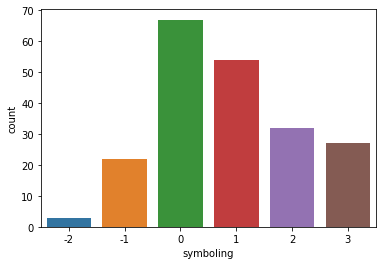

In [6]:
sns.countplot(df['symboling'])

## 3.2 CarName

In [7]:
df['CarName'].nunique()

147

In [8]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [9]:
def Clean_text(x):
    z=x.split(" ")
    y=z[0]
    return y

In [10]:
df['CarName1']=df['CarName'].apply(Clean_text)

In [11]:
df.drop('CarName',axis=1,inplace=True)

In [12]:
df.rename({'CarName1':'Company_Name'},axis=1,inplace=True)

In [13]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
car_ID,1,2,3,4,5,6,7,8,9,10,...,196,197,198,199,200,201,202,203,204,205
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
fueltype,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
doornumber,two,two,two,four,four,two,four,four,four,two,...,four,four,four,four,four,four,four,four,four,four
carbody,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
enginelocation,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1
carlength,168.8,168.8,171.2,176.6,176.6,177.3,192.7,192.7,192.7,178.2,...,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8


In [14]:
df['Company_Name'].value_counts().to_dict()

{'toyota': 31,
 'nissan': 17,
 'mazda': 15,
 'honda': 13,
 'mitsubishi': 13,
 'subaru': 12,
 'peugeot': 11,
 'volvo': 11,
 'volkswagen': 9,
 'dodge': 9,
 'buick': 8,
 'bmw': 8,
 'audi': 7,
 'plymouth': 7,
 'saab': 6,
 'isuzu': 4,
 'porsche': 4,
 'alfa-romero': 3,
 'chevrolet': 3,
 'jaguar': 3,
 'vw': 2,
 'maxda': 2,
 'renault': 2,
 'toyouta': 1,
 'vokswagen': 1,
 'Nissan': 1,
 'mercury': 1,
 'porcshce': 1}

In [15]:
df['Company_Name']=df['Company_Name'].replace({'toyota': 'Toyota',
 'nissan': 'Nissan',
 'mazda': 'Mazda',
 'honda': 'Honda',
 'mitsubishi': 'Mitsubishi',
 'subaru': 'Subaru',
 'peugeot': 'Peugeot',
 'volvo': "Volvo",
 'volkswagen': 'Volkswagen',
 'dodge':'Dodge',
 'buick': 'Buick',
 'bmw': 'BMW',
 'audi': 'Audi',
 'plymouth':'Plymouth',
 'saab': 'Saab',
 'isuzu': 'Isuzu',
 'porsche': 'Porsche',
 'alfa-romero': 'Alfa-romero',
 'chevrolet': 'Chevrolet',
 'jaguar': 'Jaguar',
 'vw': 'Volkswagen',
 'maxda': 'Mazda',
 'renault': 'Renault',
 'toyouta': 'Toyota',
 'vokswagen': 'Volkswagen',
 'Nissan': 'Nissan',
 'mercury': 'Mercury',
 'porcshce': 'Porcshce'})

In [16]:
df['Company_Name'].nunique()

23

<AxesSubplot:xlabel='Company_Name', ylabel='count'>

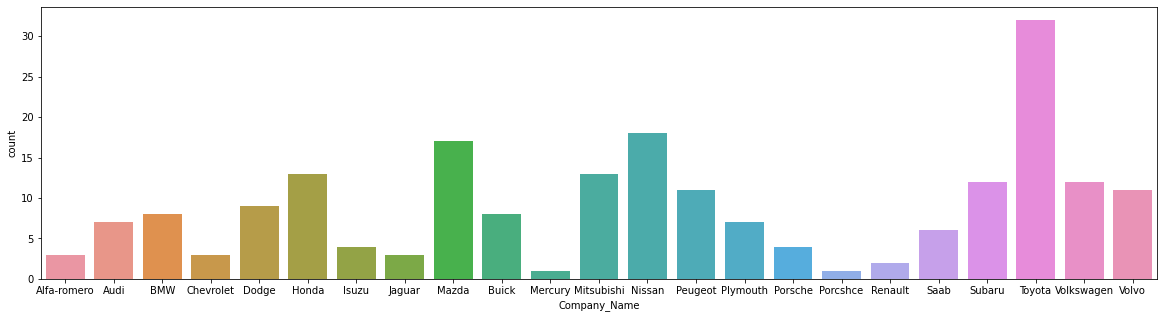

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(df['Company_Name'])

<AxesSubplot:xlabel='Company_Name', ylabel='price'>

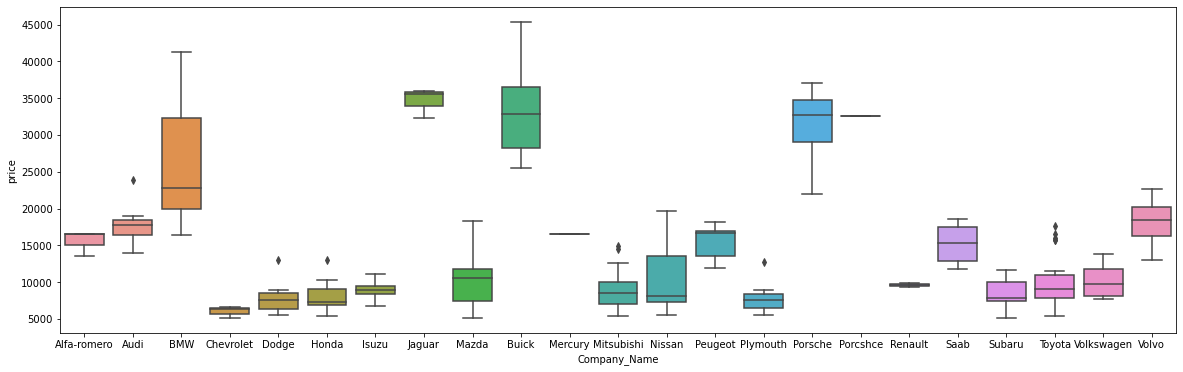

In [18]:
plt.figure(figsize=(20,6))
sns.boxplot(x=df['Company_Name'],y=df['price'])

In [19]:
# needs to do data Encoding

# 3.3 fueltype

In [20]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

<AxesSubplot:xlabel='fueltype', ylabel='count'>

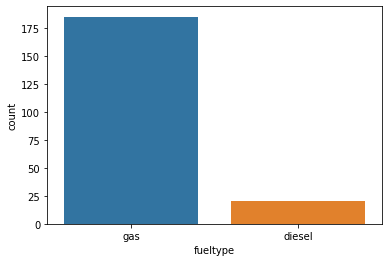

In [21]:
sns.countplot(df['fueltype'])

<AxesSubplot:xlabel='fueltype', ylabel='price'>

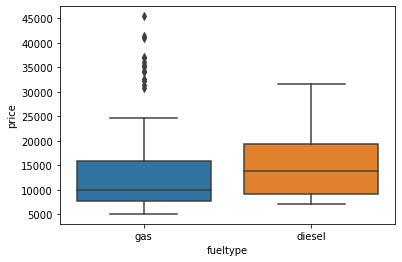

In [22]:
sns.boxplot(x=df['fueltype'],y=df['price'],data=df)

In [23]:
# Note: Data consist of more gas cars than that of diesel cars and impacts significantly on price feature.

# 3.4 aspiration

In [24]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

<AxesSubplot:xlabel='aspiration', ylabel='count'>

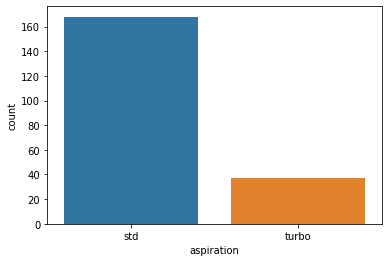

In [25]:
sns.countplot(df['aspiration'])

<AxesSubplot:xlabel='aspiration', ylabel='price'>

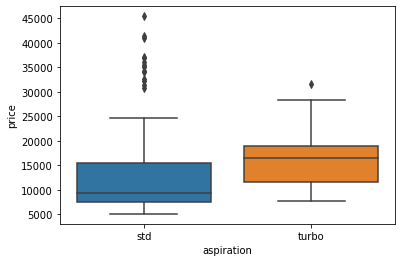

In [26]:
sns.boxplot(x=df['aspiration'],y=df['price'],data=df)

In [27]:
# the upper tail vale and lower tail value differs from the std and turbo data so its imapcting our target feature.
# here the aspiration provides data about standered car and a car with turbo feature.
# we have seen that the data for standered car are camparitivly higher than that of tubo.

# 3.5 doornumber

In [28]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

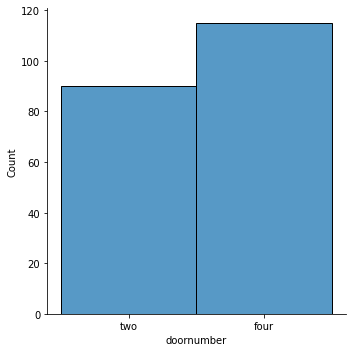

In [29]:
sns.displot(df['doornumber'])

In [30]:
# There is fine amount of data available for door number feature.

<AxesSubplot:xlabel='doornumber', ylabel='price'>

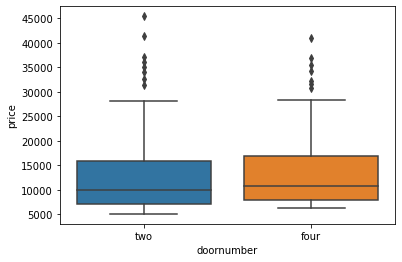

In [31]:
sns.boxplot(x=df['doornumber'],y=df['price'],data=df)

### the door number is not impacting the price as its upper tail and lower tail values are quite simillar.
### so we can conclude now that we are able to drop this feature in our further data processsing.

# 3.6 carbody

In [32]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [33]:
df['carbody'].nunique()

5

<AxesSubplot:xlabel='carbody', ylabel='count'>

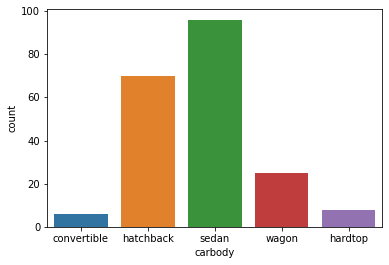

In [34]:
sns.countplot(df['carbody'])

<AxesSubplot:xlabel='carbody', ylabel='price'>

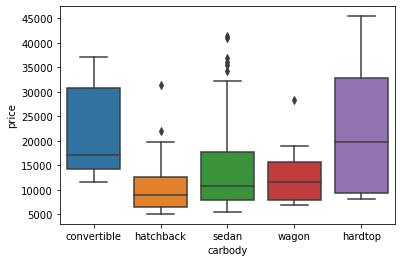

In [35]:
sns.boxplot(x=df['carbody'],y=df['price'],data=df)

In [36]:
# As the car body type changes the price is chainging...
# its a one of the important feature in our data set...

In [37]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'Company_Name'],
      dtype='object')

# 3.7 drivewheel

In [38]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

<AxesSubplot:xlabel='drivewheel', ylabel='count'>

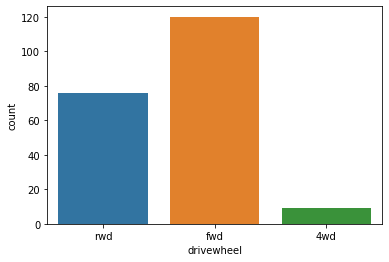

In [39]:
sns.countplot(df['drivewheel'])

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

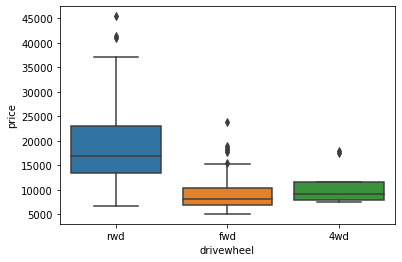

In [40]:
sns.boxplot(x=df['drivewheel'],y=df['price'])

In [41]:
#as there is vide range of data in the plot the feature drivewheel have significance importance on target.

# 3.8 enginelocation

In [42]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

<AxesSubplot:xlabel='enginelocation', ylabel='price'>

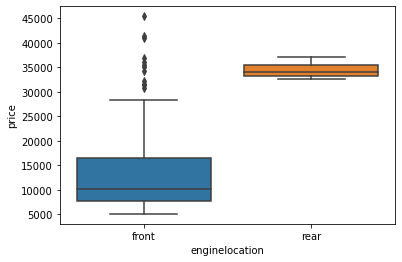

In [43]:
sns.boxplot(x=df['enginelocation'],y=df['price'],data=df)

In [44]:
# Price is making significant importance in enginelocation feature
# as in genereal price of reare engine are higher than that of frount engine

# 3.9 wheelbase

In [45]:
df['wheelbase'].nunique()

53

In [46]:
len(df)

205

In [47]:
df['wheelbase'].value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheelbase, dtype: int64

<AxesSubplot:xlabel='wheelbase', ylabel='price'>

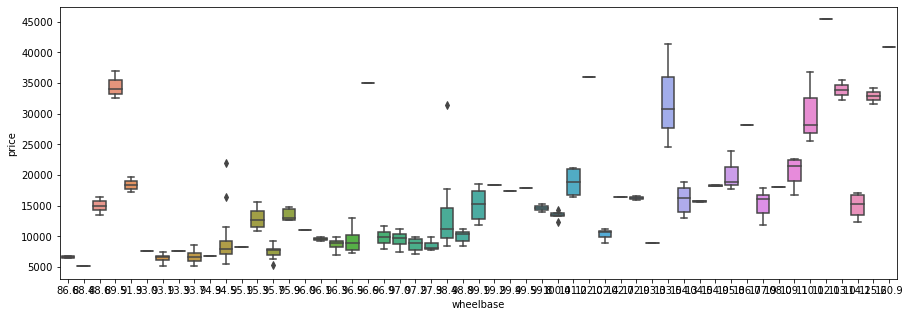

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['wheelbase'],y=df['price'])

In [49]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'Company_Name'],
      dtype='object')

# 3.10 carlength

In [50]:
df['carlength'].nunique()

75

# 3.11 carwidth

In [51]:
df['carwidth'].nunique()

44

# 3.12 enginetype

In [52]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

<AxesSubplot:xlabel='enginetype', ylabel='count'>

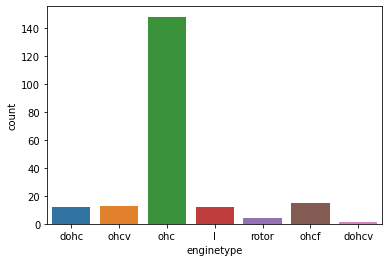

In [53]:
sns.countplot(df['enginetype'])

<AxesSubplot:xlabel='enginetype', ylabel='price'>

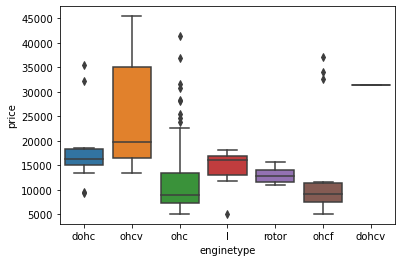

In [54]:
sns.boxplot(x=df['enginetype'],y=df['price'])

In [55]:
# engine type is making a varied range on price of car and it might be one of the important feature for car price prediction

# 3.13 cylindernumber

In [56]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

<AxesSubplot:xlabel='cylindernumber', ylabel='count'>

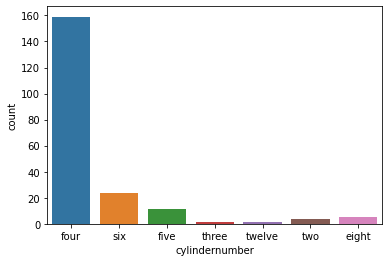

In [57]:
sns.countplot(df['cylindernumber'])

In [58]:
# there are mamimum for cylinder car data in the dataset.


In [59]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'Company_Name'],
      dtype='object')

# 3.14 enginesize

In [60]:
df['enginesize'].nunique()

44

<AxesSubplot:xlabel='enginesize', ylabel='price'>

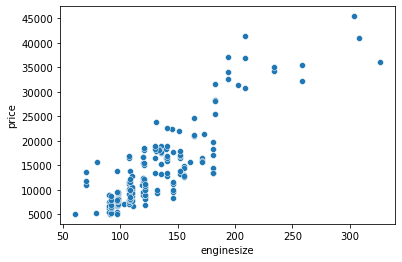

In [61]:
sns.scatterplot(x=df['enginesize'],y=df['price'])

# 3.15 fuelsystem

In [62]:
df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

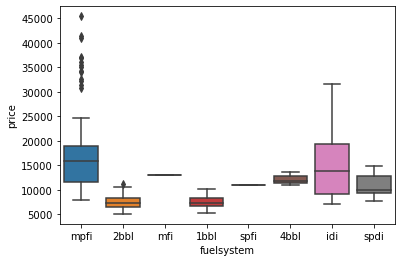

In [63]:
sns.boxplot(x=df['fuelsystem'],y=df['price'])

# 3.16 boreratio

In [64]:
df['boreratio'].nunique()

38

<AxesSubplot:xlabel='boreratio', ylabel='price'>

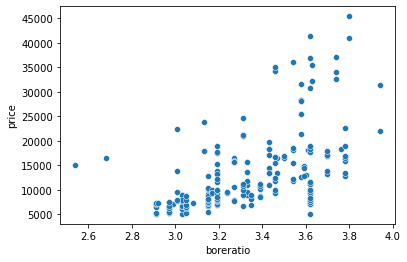

In [65]:
sns.scatterplot(df['boreratio'],df['price'])

# 3.17 stroke

In [66]:
df['stroke'].nunique()

37

<AxesSubplot:xlabel='stroke', ylabel='price'>

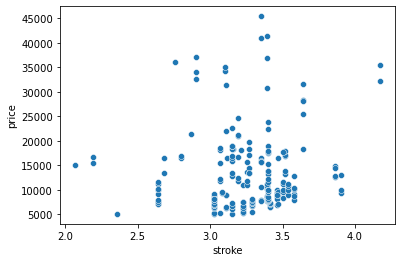

In [67]:
sns.scatterplot(x=df['stroke'],y=df['price'])

# 3.18 compressionratio

In [68]:
df['compressionratio'].nunique()

32

<AxesSubplot:xlabel='compressionratio', ylabel='price'>

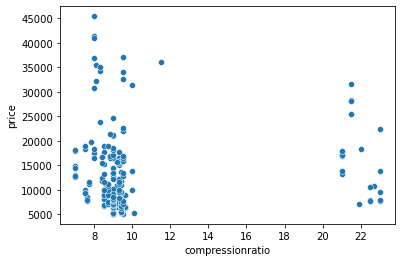

In [69]:
sns.scatterplot(df['compressionratio'],df['price'])

In [70]:
# the compresssion ratio is mainly ranging from  6-12 and 21-25 this two category only.

In [71]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'Company_Name'],
      dtype='object')

# 3.19  horsepower

In [72]:
df['horsepower'].nunique()

59

<AxesSubplot:xlabel='horsepower', ylabel='price'>

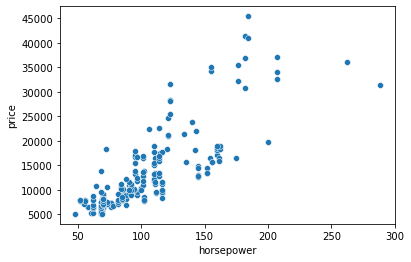

In [73]:
sns.scatterplot(df['horsepower'],df['price'])

In [74]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'Company_Name'],
      dtype='object')

In [75]:
# df_plot=df.loc[:,'boreratio':'highwaympg']
# sns.pairplot(x_vars=df_plot,y_vars=df['price'],kind='scatter',data=df)

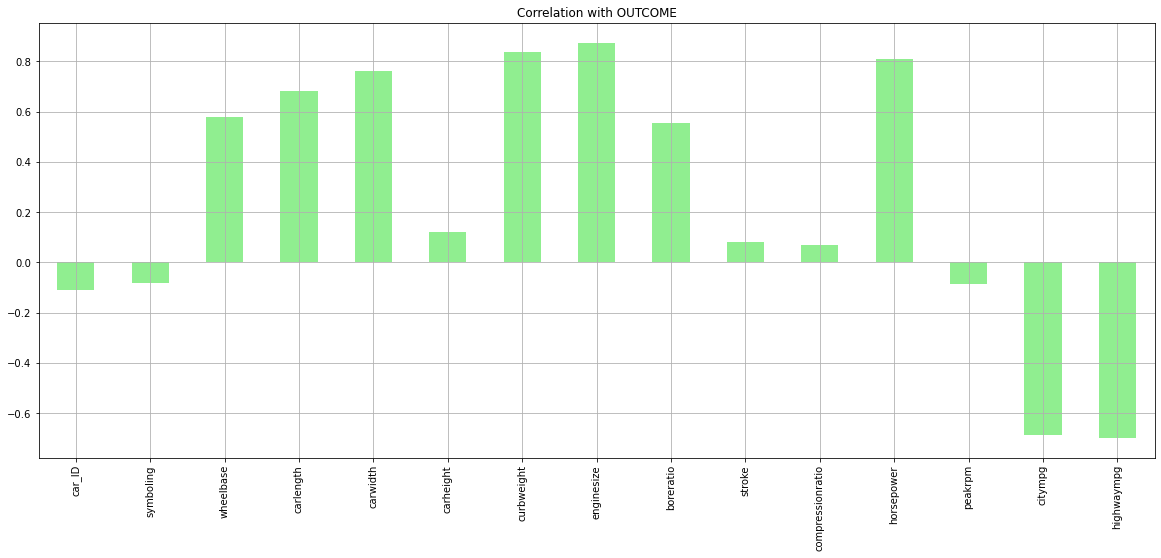

In [76]:
df.drop('price', axis=1).corrwith(df.price).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with OUTCOME",color="lightgreen");

# Feature Enginerring

## One Hot encoding

In [77]:
list_obj=[]
for index,value in  enumerate(df.dtypes):
    if value=='object':
        list_obj.append(df.columns[index])
    else:
        pass

In [78]:
df_dummies=pd.DataFrame(df[list_obj])
df_dummies

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company_Name
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,Alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,Alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,Alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,Audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,Audi
...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi,Volvo
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,Volvo
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,Volvo
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,Volvo


In [79]:
list_obj

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'Company_Name']

In [80]:
df_dummies_done=pd.get_dummies(df_dummies,drop_first=True)

In [81]:
df_dummies_done

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,Company_Name_Peugeot,Company_Name_Plymouth,Company_Name_Porcshce,Company_Name_Porsche,Company_Name_Renault,Company_Name_Saab,Company_Name_Subaru,Company_Name_Toyota,Company_Name_Volkswagen,Company_Name_Volvo
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
201,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
202,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
203,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
df_new=pd.concat([df,df_dummies_done],axis=1)

In [83]:
df_final=df_new.drop(list_obj,axis=1)

In [84]:
df_corr=df.drop(list_obj,axis=1)

In [85]:
df_final.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
car_ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0
symboling,3.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,...,-1.0,-2.0,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
wheelbase,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1
carlength,168.8,168.8,171.2,176.6,176.6,177.3,192.7,192.7,192.7,178.2,...,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8
carwidth,64.1,64.1,65.5,66.2,66.4,66.3,71.4,71.4,71.4,67.9,...,67.2,67.2,67.2,67.2,67.2,68.9,68.8,68.9,68.9,68.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Company_Name_Saab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Company_Name_Subaru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Company_Name_Toyota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Company_Name_Volkswagen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
df_final.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Company_Name_Audi',
       'Company_Name_BMW', 'Company_Name_Buick', 'Company_Name_Chevrolet',
       'Company_Name_Dodge', 'Company_Na

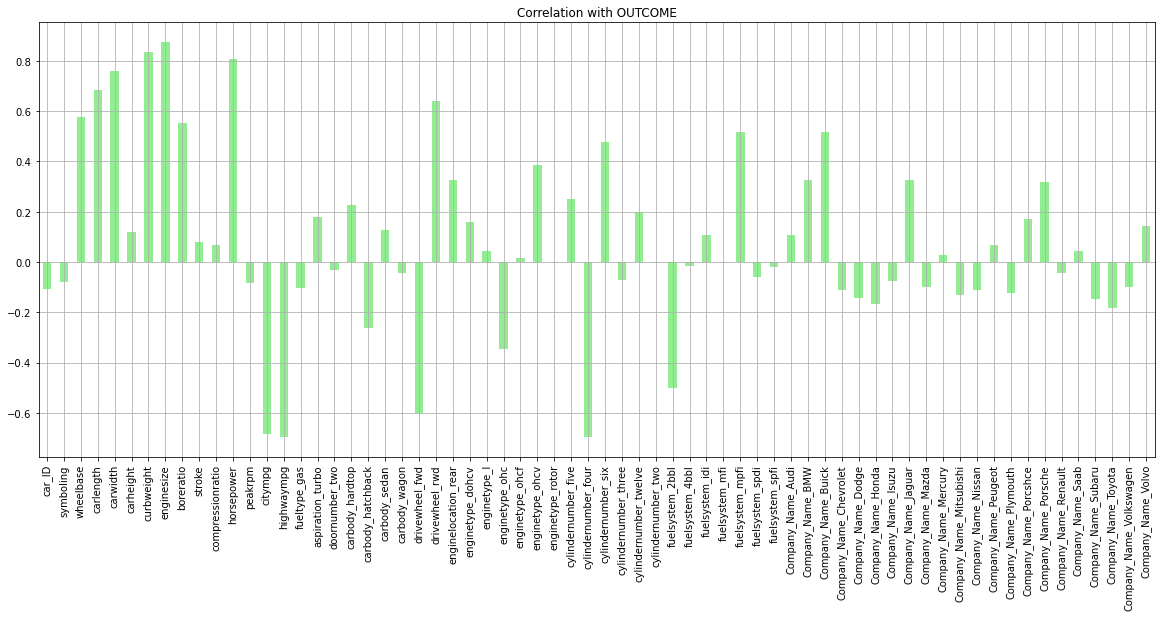

In [87]:
df_final.drop('price', axis=1).corrwith(df_final.price).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with OUTCOME",color="lightgreen");

In [89]:
df_final.drop('price', axis=1).corrwith(df_final.price)

car_ID                    -0.109093
symboling                 -0.079978
wheelbase                  0.577816
carlength                  0.682920
carwidth                   0.759325
                             ...   
Company_Name_Saab          0.042414
Company_Name_Subaru       -0.148167
Company_Name_Toyota       -0.182997
Company_Name_Volkswagen   -0.100100
Company_Name_Volvo         0.143017
Length: 66, dtype: float64

In [90]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


# Checking Assumptions for Linear regressions 

### 1.1 Linarity

In [91]:
# sns.pairplot(df_corr)

In [92]:
df_corr.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### 1.3 No Multicollinerity

<AxesSubplot:>

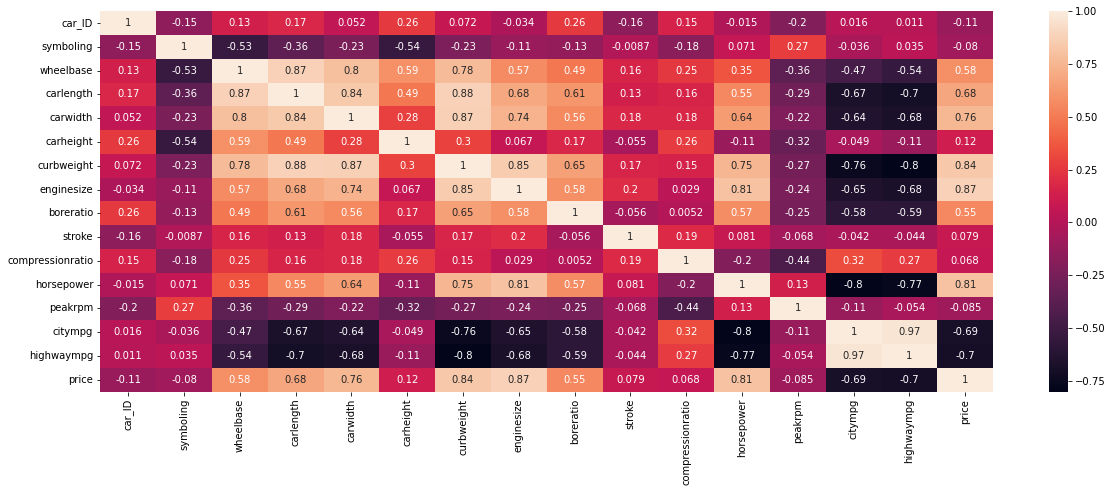

In [93]:
plt.figure(figsize=(20,7))
sns.heatmap(df_corr.corr(),annot=True)

# As in our Data independent variables are  highly correlated with each other it fails for our linear regression model.

# Lets Assume here onwords that our model is following Linear regression Assumptions

## Model-building for Linear regression on Staderdize Data

In [94]:
drop_df=['car_ID', 'price']

In [95]:
x=df_final.drop(drop_df,axis=1)
y=df_final['price']
x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,Company_Name_Peugeot,Company_Name_Plymouth,Company_Name_Porcshce,Company_Name_Porsche,Company_Name_Renault,Company_Name_Saab,Company_Name_Subaru,Company_Name_Toyota,Company_Name_Volkswagen,Company_Name_Volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,0,0,1
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,0,0,1
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,LogisticRegression

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=55,test_size=30)

In [98]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [99]:
y_predict=linear_model.predict(x_test)

In [100]:
r2score=r2_score(y_test,y_predict)
r2score

0.9648302471508015

In [101]:
mse=mean_squared_error(y_test,y_predict)
mse

1931613.9302546124

In [102]:
mae=mean_absolute_error(y_test,y_predict)
mae

1148.0290871047096

# Root Mean Square Error


In [103]:
rmse=np.sqrt(mse)
print(rmse)

1389.8251437697522


In [104]:
df_final['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=30)


linear_model=LinearRegression()

linear_model.fit(x_train,y_train)

print('x'*50)
print('Testing Data Evaluation')
print('x'*50)
y_predict=linear_model.predict(x_test)
r2score=r2_score(y_test,y_predict)
print(f'r2score: {r2score}')
mse=mean_squared_error(y_test,y_predict)
print(f'mse : {mse}')
rmse=np.sqrt(mse)
print(f'rmse: {rmse}')
mae=mean_absolute_error(y_test,y_predict)
print(f'mae: {mae}')


print('x'*50)
print('Training Data Evaluation')
print('x'*50)

y_predict_train=linear_model.predict(x_train)
r2score1=r2_score(y_train,y_predict_train)
print(f'r2score: {r2score1}')
mse=mean_squared_error(y_train,y_predict_train)
print(f'mse : {mse}')
rmse=np.sqrt(mse)
print(f'rmse: {rmse}')
mae=mean_absolute_error(y_train,y_predict_train)
print(f'mae: {mae}')


print()
print(f' Training Accuracy : {np.round(r2score1*100)}')
print(f' Testing Accuracy : {np.round(r2score*100)}')

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Testing Data Evaluation
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
r2score: 0.932320123380044
mse : 3816762.5586947827
rmse: 1953.6536434830978
mae: 1589.8699583760108
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training Data Evaluation
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
r2score: 0.9680217493955374
mse : 2068549.1207571472
rmse: 1438.2451532187226
mae: 1052.2346640125947

 Training Accuracy : 97.0
 Testing Accuracy : 93.0


In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60,test_size=30)


linear_model=LinearRegression()

linear_model.fit(x_train,y_train)

print('x'*50)
print('Testing Data Evaluation')
print('x'*50)

y_predict=linear_model.predict(x_test)
r2score=r2_score(y_test,y_predict)
print(f'r2score: {r2score}')
mse=mean_squared_error(y_test,y_predict)
print(f'mse : {mse}')
rmse=np.sqrt(mse)
print(f'rmse: {rmse}')
mae=mean_absolute_error(y_test,y_predict)
print(f'mae: {mae}')


print('x'*50)
print('Training Data Evaluation')
print('x'*50)

y_predict_train=linear_model.predict(x_train)
r2score1=r2_score(y_train,y_predict_train)
print(f'r2score: {r2score1}')
mse=mean_squared_error(y_train,y_predict_train)
print(f'mse : {mse}')
rmse=np.sqrt(mse)
print(f'rmse: {rmse}')
mae=mean_absolute_error(y_train,y_predict_train)
print(f'mae: {mae}')

print()
print(f' Training Accuracy : {np.round(r2score1*100)}')
print(f' Testing Accuracy : {np.round(r2score*100)}')

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Testing Data Evaluation
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
r2score: 0.9101459955178659
mse : 6328292.398600443
rmse: 2515.6097468805538
mae: 1807.5985754657115
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training Data Evaluation
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
r2score: 0.9692527188685958
mse : 1913071.048194881
rmse: 1383.13811609502
mae: 992.1713691145803

 Training Accuracy : 97.0
 Testing Accuracy : 91.0


# Outlier Detection 

In [ ]:
1
2)
3)
4)